# Algoritmo de Softmax

Leia a explicação do algoritmo no [README.md!](README.md)

In [1]:
import sys
sys.path.append('../')
import bandit #importa o ambient
import numpy as np

## Definindo a função Softmax

In [2]:
def softmax(list):
    """(lista de valores) -> lista com probabilidades
    Aplica a função softmax em uma lista de valores, os transformando em probabilidades respectivas.
    """
    exp_H = (np.exp(list))
    sum_exp_H = np.sum(exp_H)
    prob_list = exp_H/sum_exp_H

    return(prob_list)

Lembrando que a função Softmax é:

$Pr[A_t = a] \doteq \frac{e^{H_t(a)}}{\sum^{k}_{b=1}e^{H_t(b)}} \doteq \pi_t(a)$

O que ela faz é pegar um vetor de valores numéricos de **preferências** $H$ e transforma esses valores numéricos em valores probabilísticos, os quais vão ser usados para escolher a ação.

## Definindo o Agente

In [3]:
class Softmax(object):
    def __init__(self, k_arms, step_size=0.1):
        self.step_size = step_size
        self.k_arms = k_arms
        self.H_values = np.zeros(k_arms)
        self.last_action = np.random.choice(k_arms)

    def agent_step(self, reward, reward_means):
        """ (float) -> acao(int)
        Dá um step para o Agente atualizando os valores H. 
        Pega a recompensa do estado e retorna a ação escolhida.
        """

        pi_values = softmax(self.H_values)

        for a in range(self.k_arms):
            if a != self.last_action:
                self.H_values[self.last_action] += self.step_size*(reward - reward_means)*(1 - pi_values[self.last_action])
            else:
                self.H_values[a] -= self.step_size*(reward - reward_means) * pi_values[a]
        
        current_action = np.random.choice(self.k_arms, 1, p=pi_values)

        return current_action

Lembre-se que como agora não estão sendo estimados os valores para uma recompensa é método de atualização das **preferências** $H$ têm que ser diferente, no caso elas são dadas da seguinte maneira:

$H_{t+1}(A_t) = H_t(A_t) + \alpha (R_t - \bar{R}_t)(1-\pi_t(A_t))$

E para todo $a \neq A_t$

$H_{t+1}(a) = H_t(a) + \alpha (R_t - \bar{R}_t)\pi_t(a)$

## Testando o Agente

In [4]:
import matplotlib.pyplot as plt

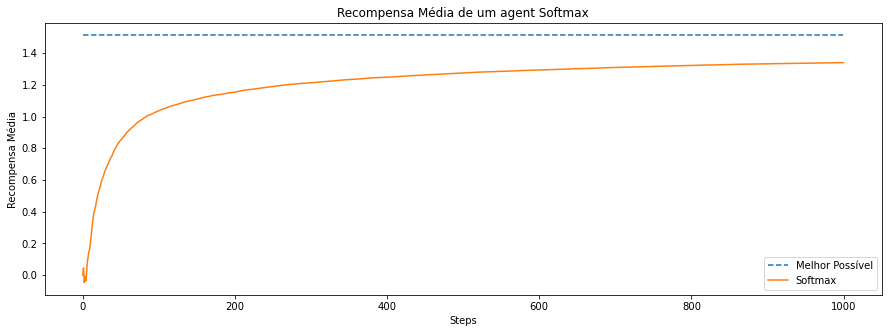

In [9]:
num_runs = 200
num_steps = 1000
np.random.seed(1)
total_means = []

max_mean = 0
for runs in range(num_runs):

    agent = Softmax(k_arms=10, step_size=0.1)

    env = bandit.GaussianBandit(k_arms=10)

    score = [0]
    means = [0]

    max_mean += np.max(env.bandits_expectations)

    for steps in range(0, num_steps):
        reward = env.gamble(agent.last_action)
        agent.last_action = agent.agent_step(reward, means[steps])

        score.append(score[-1] + reward)
        means.append(score[-1]/(steps+1))
    total_means.append(means)

plt.figure(figsize=(15,5))
plt.plot([max_mean / num_runs for _ in range(num_steps)], linestyle="--")
plt.plot(np.mean(total_means, axis=0))
plt.legend(["Melhor Possível", "Softmax"])
plt.title("Recompensa Média de um agent Softmax")
plt.xlabel("Steps")
plt.ylabel("Recompensa Média")
plt.show()